In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Подключение к БД

In [2]:
db = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
query = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])

In [4]:
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['day'] = commits['timestamp'].dt.day
commits['hour'] = commits['timestamp'].dt.hour

In [5]:
commits['is_weekend'] = commits['weekday'] >= 5
commits

,uid,timestamp,weekday,day,hour,is_weekend
0,user_4,2020-04-17 05:19:02.744528,4,17,5,False
1,user_4,2020-04-17 05:22:35.249331,4,17,5,False
2,user_4,2020-04-17 05:22:45.549397,4,17,5,False
3,user_4,2020-04-17 05:34:14.691200,4,17,5,False
4,user_4,2020-04-17 05:34:24.422370,4,17,5,False
...,...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,3,21,20,False
3203,user_1,2020-05-21 20:22:41.785725,3,21,20,False
3204,user_1,2020-05-21 20:22:41.877806,3,21,20,False
3205,user_1,2020-05-21 20:37:00.129678,3,21,20,False


In [6]:
working_days = commits[commits['is_weekend'] == False]['hour'].reset_index(drop=True)
weekends = commits[commits['is_weekend'] == True]['hour'].reset_index(drop=True)
working_days

0        5
1        5
2        5
3        5
4        5
        ..
2032    20
2033    20
2034    20
2035    20
2036    20
Name: hour, Length: 2037, dtype: int32

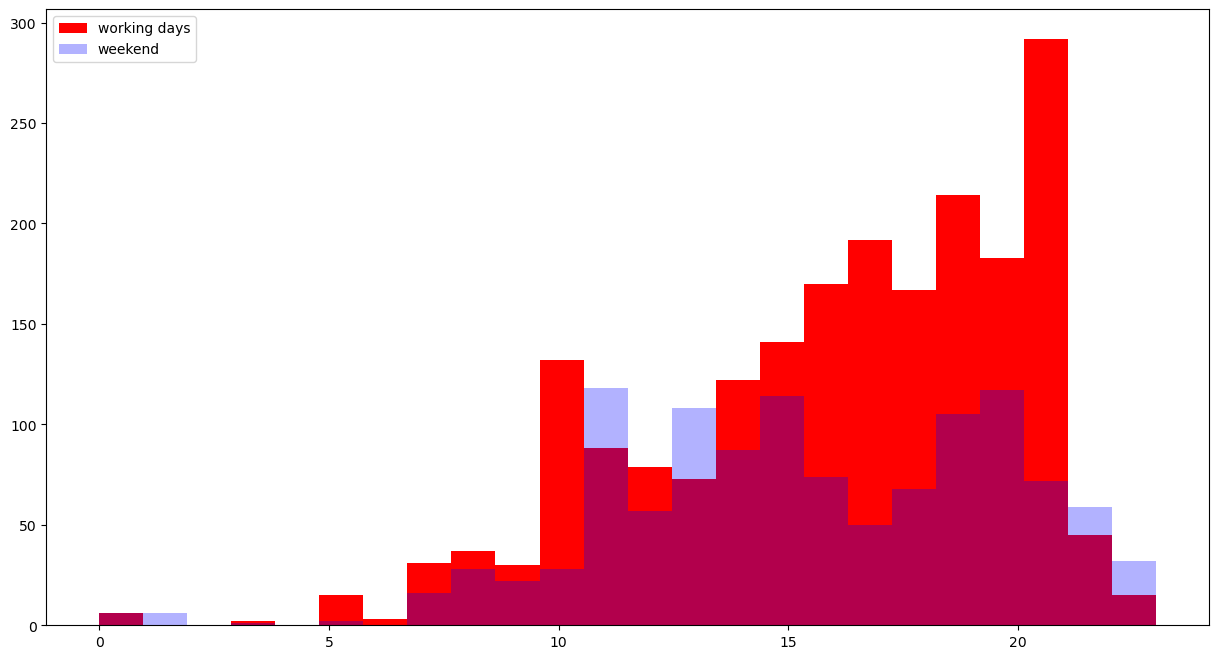

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

ax.hist(working_days,
        label = 'working days',
        bins = 24,
        color = 'red')
ax.hist(weekends,
        label = 'weekend',
        bins = 24,
        alpha=0.3,
        color = 'blue')
ax.legend(loc='upper left', fontsize='10')
plt.show()

Бывают ли часы, когда общее количество коммитов в выходные дни было выше, чем в рабочие дни?

Ответ: Да, это часы 11, 13, 22 и 23

In [8]:
db.close()